In [1]:
import compas
from compas.datastructures import Mesh
from compas_plotters import MeshPlotter

mesh = Mesh()

a = mesh.add_vertex(x=0.0, y=0.0)
b = mesh.add_vertex(x=1.0, y=0.0)
c = mesh.add_vertex(x=1.0, y=1.0)
d = mesh.add_vertex(x=0.0, y=1.0)

f = mesh.add_face([a, b, c, d])

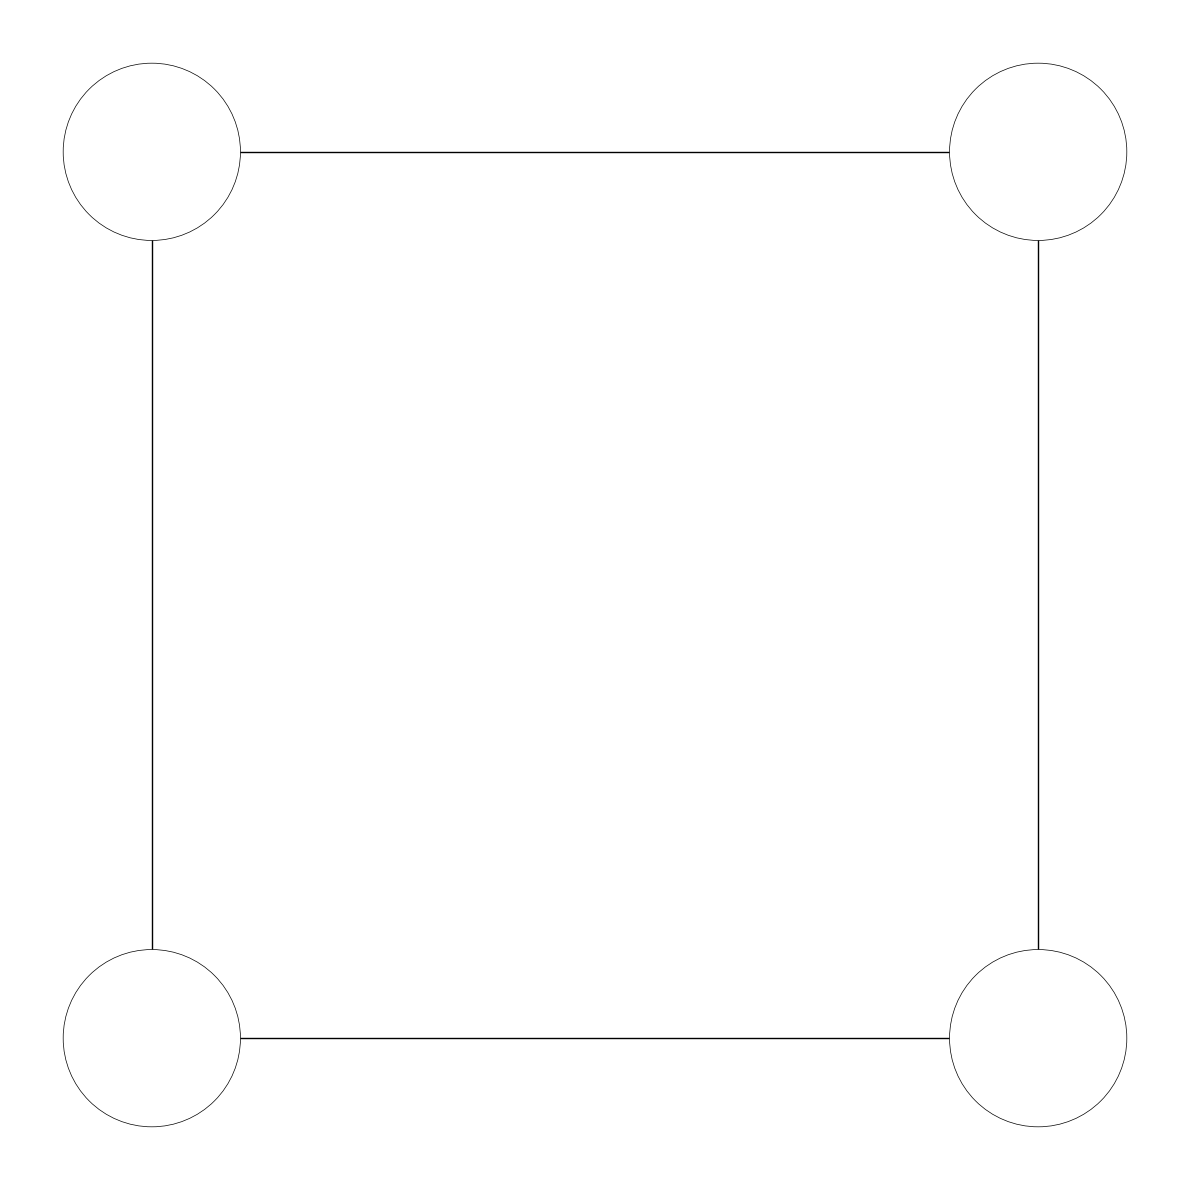

In [2]:
plotter = MeshPlotter(mesh)

plotter.draw_edges()
plotter.draw_vertices()

plotter.show()

In [3]:
for key in mesh.vertices():
    print("vertice key:", key)
for key in mesh.faces():
    print("face key:", key)
    print(key, "(vertices)", mesh.face_vertices(key))

vertice key: 0
vertice key: 1
vertice key: 2
vertice key: 3
face key: 0
0 (vertices) [0, 1, 2, 3]


In [18]:
def mesh_sdivide_old(mesh):
    for key in mesh.faces():
        #print(key, "(vertices)", mesh.face_vertices(key))
        #print("face centroid", mesh.face_centroid(key))
        
        c = mesh.face_centroid(key)
        v_key = mesh.add_vertex(x=c[0], y=c[1])

    for face in mesh.faces:    
        mesh.add_face([0,1,v_key])
        mesh.add_face([v_key,1,2])
        mesh.add_face([0,v_key,2])
    
    vk = (mesh.face[key])
    print(vk)
    print(v_key)

    #esh.add_face([vk[0],vk[1],v_key])

    # mesh.add_face([])

    # mesh.add_face([a, b, c, d])
    # mesh.delete_face(key)     
        
    return mesh

def mesh_sdivide(mesh):
    new_keys = []
    for key in mesh.faces():
        v_coords = mesh.face_coordinates(key, axes='xy')
        v_keys = mesh.face_vertices(key)
        c = mesh.face_centroid(key)
        
        v1 = compas.geometry.midpoint_point_point_xy(v_coords[0], v_coords[1])
        v2 = compas.geometry.midpoint_point_point_xy(v_coords[1], v_coords[2])
        v3 = compas.geometry.midpoint_point_point_xy(v_coords[2], v_coords[3])
        v4 = compas.geometry.midpoint_point_point_xy(v_coords[3], v_coords[0])
        
        new_vertice_key_1 = mesh.add_vertex(x=v1[0],y=v1[1])
        new_vertice_key_2 = mesh.add_vertex(x=v2[0],y=v2[1])
        new_vertice_key_3 = mesh.add_vertex(x=v3[0],y=v3[1])
        new_vertice_key_4 = mesh.add_vertex(x=v4[0],y=v4[1])
        new_vertice_key_5 = mesh.add_vertex(x=c[0]+1, y=c[1]-1) 
        new_v_keys = [new_vertice_key_1,
                      new_vertice_key_2,
                      new_vertice_key_3,
                      new_vertice_key_4,
                      new_vertice_key_5]
        new_v_keys.extend(v_keys)
        new_keys.append(new_v_keys)
    for kl in new_keys:
        mesh.add_face([kl[5],kl[0],kl[4],kl[3]])
        mesh.add_face([kl[0],kl[6],kl[1],kl[4]])
        mesh.add_face([kl[4],kl[1],kl[7],kl[2]])
        mesh.add_face([kl[3],kl[4],kl[2],kl[8]])
        
    return mesh

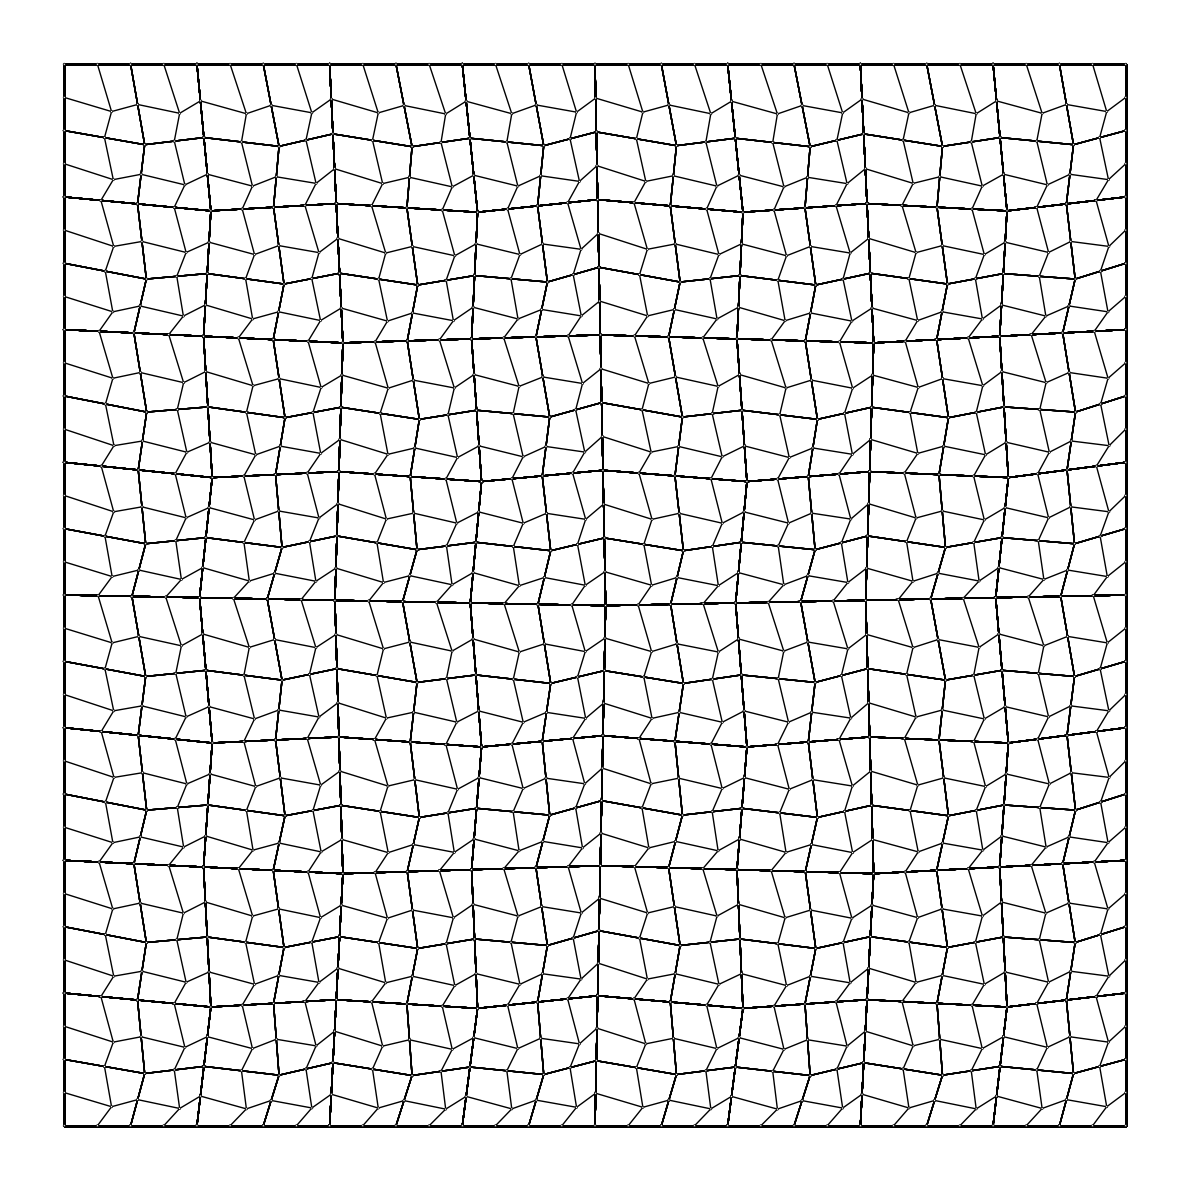

In [20]:
mesh = Mesh()

s = 100

a = mesh.add_vertex(x=0.0*s , y=0.0*s)
b = mesh.add_vertex(x=1.0*s, y=0.0*s)
c = mesh.add_vertex(x=1.0*s, y=1.0*s)
d = mesh.add_vertex(x=0.0*s, y=1.0*s)

f = mesh.add_face([a, b, c, d])

for i in range(5):
    mesh = mesh_sdivide(mesh)

plotter = MeshPlotter(mesh)

plotter.draw_edges()
plotter.draw_vertices()

plotter.show()